In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# pd.options.mode.chained_assignment = None
df = pd.read_csv(r'C:\Users\Malik Hardy\Downloads\movies.csv')



In [5]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
df = df.dropna()


In [5]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country       budget        gross  \
0     United Kingdom   19000000.0   46998772.0   
1      United States    4500000.0   58853106.0   
2      United States   18000000.0  538375067.0   
3      United States    3500000.0   83453539.0   
4      United States    6000000.0   39846344.0   
...              ...          ...          ...   
7648   United States   90000000.0  426505244.0   
7649   United States   85000000.0  319715683.0   
7650   United States  175000000.0  245487753.0   
7651          Canada  135000000.0  111105497.0   
7652           China   80000000.0  461421559.0   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [7]:
#Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#Change data types of Cols Budget and gross to INT

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')



In [6]:
#Creating correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df


name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  yearcorrect  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [15]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [4]:
pd.set_option('display.max_rows', 100)

In [6]:
# Drop any duplicates

df.drop_duplicates()

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [ ]:
# Using scatterplot to compare budget vs gross revenue

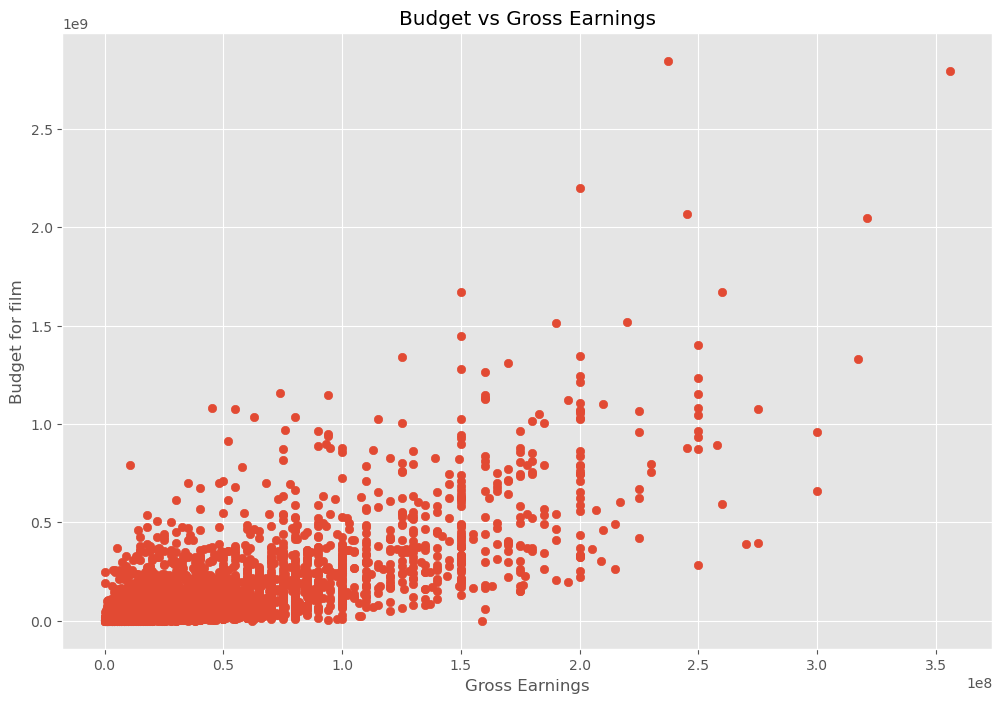

In [24]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

In [23]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

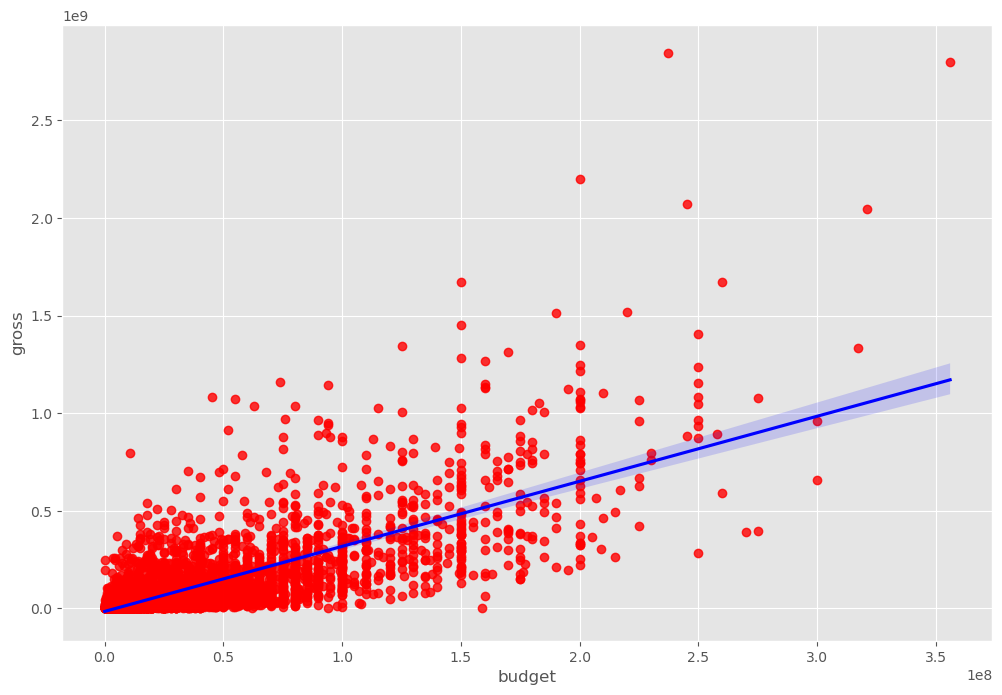

In [27]:
#Plotting budget vs rows using seaborn


sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})  

In [ ]:
# Looking at correlations #Pearson, kendall , spearman

In [34]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

In [7]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.039389  0.296512  0.220833  0.239539  0.064824   
score        0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254   
votes        0.296512  0.350185  1.000000  0.346274  0.553625  0.205344   
budget       0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278   
gross        0.239539  0.124943  0.553625  0.512057  1.000000  0.176979   
runtime      0.064824  0.292254  0.205344  0.231278  0.176979  1.000000   
yearcorrect  0.991304  0.043400  0.293044  0.213719  0.232372  0.064793   

             yearcorrect  
year            0.991304  
score           0.043400  
votes           0.293044  
budget          0.213719  
gross           0.232372  
runtime         0.064793  
yearcorrect     1.000000

In [8]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime  \
year         1.000000  0.057741  0.427623  0.312886  0.351045  0.095444   
score        0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155   
votes        0.427623  0.495409  1.000000  0.493461  0.745793  0.300621   
budget       0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794   
gross        0.351045  0.183192  0.745793  0.692958  1.000000  0.257400   
runtime      0.095444  0.412155  0.300621  0.330794  0.257400  1.000000   
yearcorrect  0.998694  0.063674  0.422988  0.302535  0.340529  0.095507   

             yearcorrect  
year            0.998694  
score           0.063674  
votes           0.422988  
budget          0.302535  
gross           0.340529  
runtime         0.095507  
yearcorrect     1.000000

In [ ]:
# High correlation between budget and gross (Pearson)

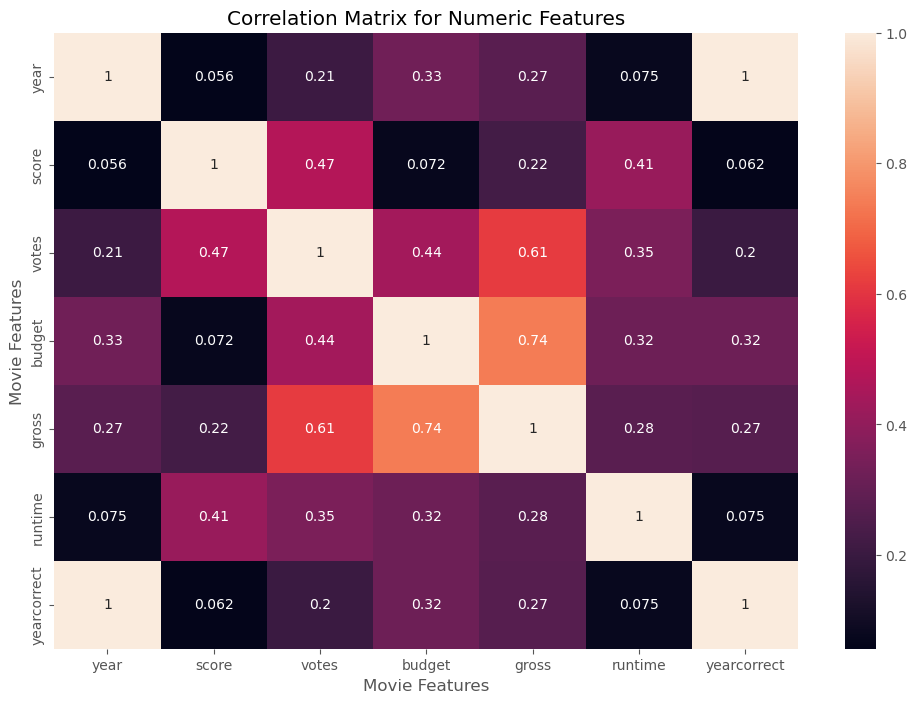

In [37]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [ ]:
# Correlation between Rating Score and Gross revenue
# Does a higher Rating equal more sales

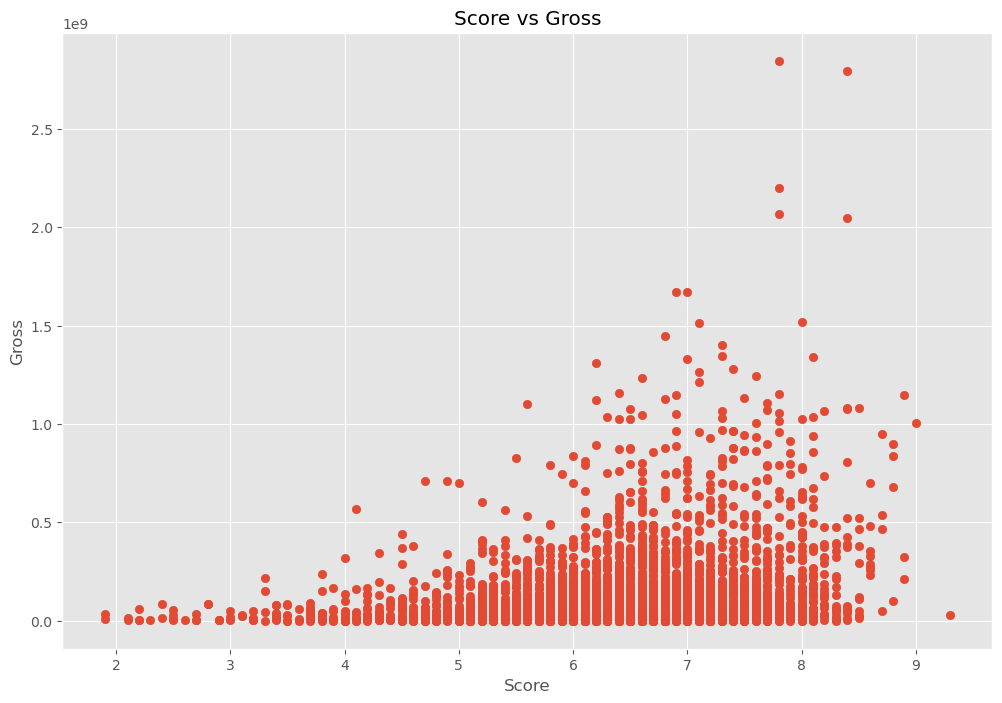

In [23]:
# Creating a scatter plot of ratings vs. revenue

plt.scatter(x=df['score'], y=df['gross'])

plt.title('Score vs Gross')

plt.xlabel('Score')

plt.ylabel('Gross')

plt.style.use('ggplot')

plt.show()


In [ ]:
# Correlation between Gross and rating

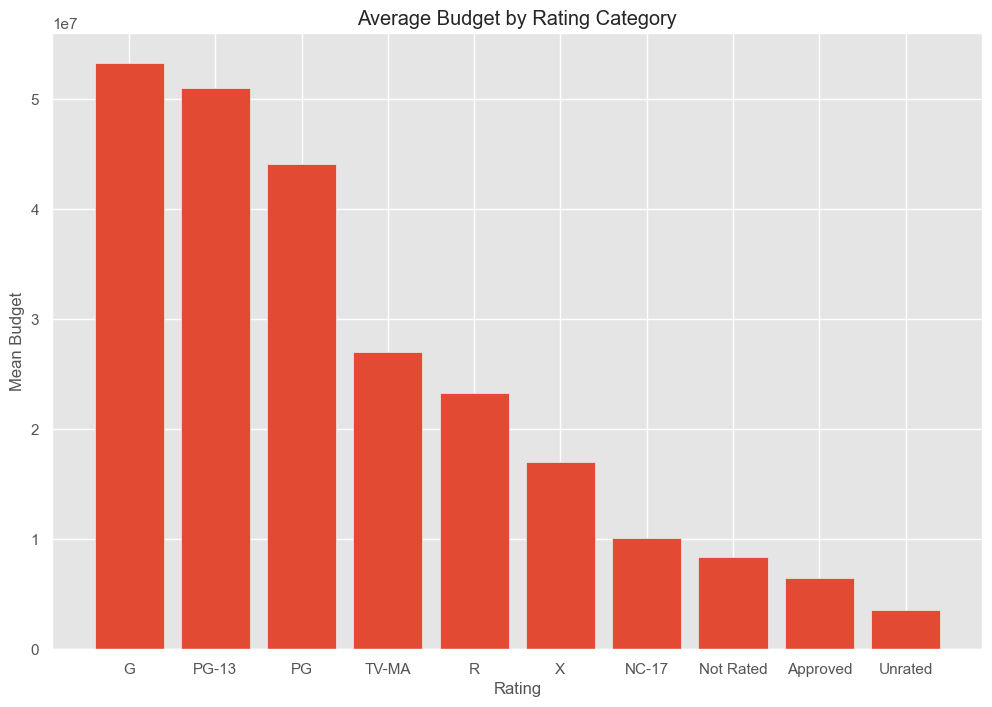

In [34]:
# Bar Chart Showing how much money does films in a specific rating category usually make

# Create a bar chart of mean budget by rating category
budget_by_rating = df.groupby('rating')['budget'].mean().sort_values(ascending=False)
plt.bar(budget_by_rating.index, budget_by_rating)
plt.xlabel('Rating')
plt.ylabel('Mean Budget')
plt.title('Average Budget by Rating Category')
plt.show()





In [ ]:
# Correlation Between Budget and rating

<AxesSubplot:xlabel='rating', ylabel='budget'>

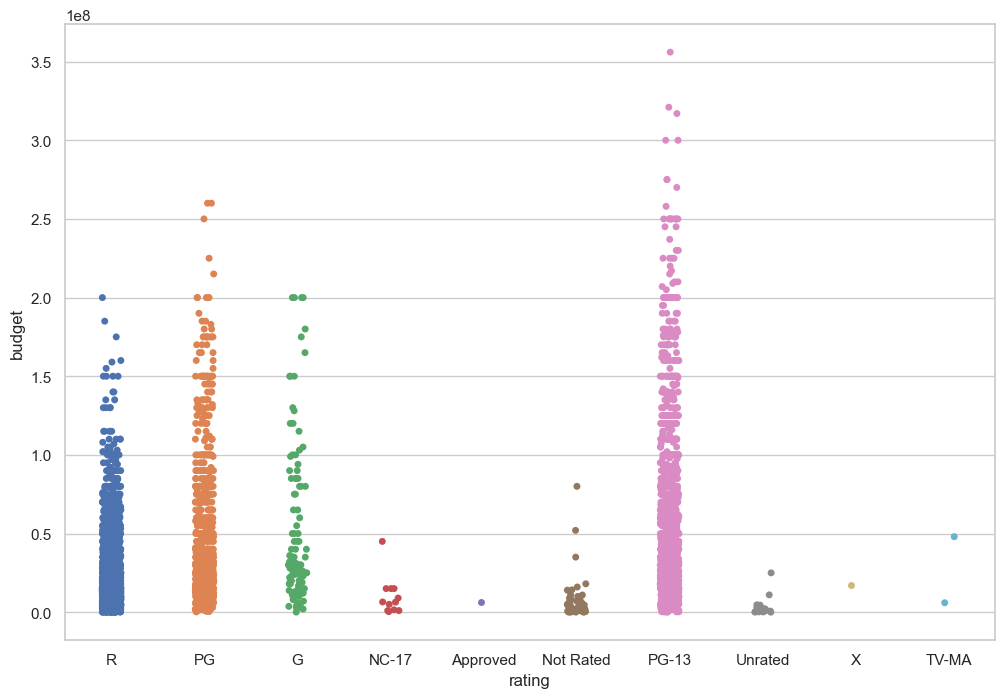

In [29]:
# Stripplot of how film budgets differ between the different rating categories

sns.stripplot(x="rating", y="budget", data=df)

In [ ]:
# Correlation betwteen Runtime and Gross revenue

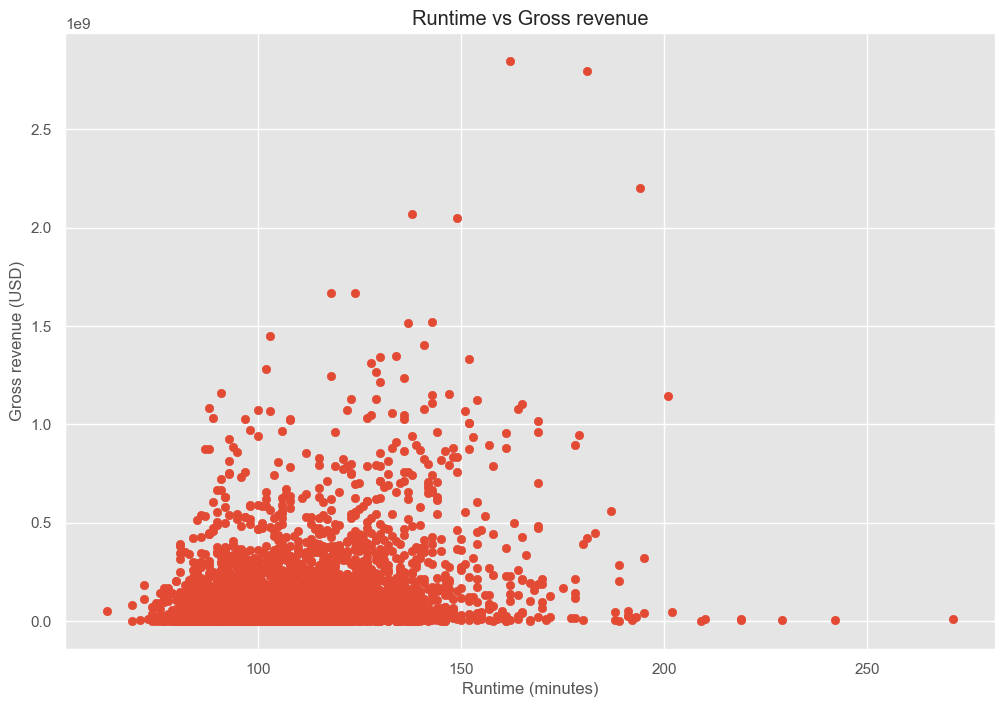

In [39]:
plt.scatter(df['runtime'], df['gross'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross revenue (USD)')
plt.title('Runtime vs Gross revenue')
plt.show()





In [9]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [10]:
df['Year'] = df['released'].astype(str).str[:4]
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  yearcorrect  Year  
0                            Warner Bros.    146.0         1980  June  
1                       Columbia Pictures    104.0         1980  July  
2                               Lucasfilm    124.0         1980  June  
3                      Paramount Pictures     88.0         1980  July  
4                          Orion Pictures     98.0         1980  July  
...                                   ...      ...          ...   ...  
7648                    Columbia Pictures    124.0         2020  Janu  
7649                   Paramount Pictures     99.0         2020  Febr  
7650                   Universal Pictures    101.0         2020  Janu  
7651                 20th Century Studios    100.0         2020  Febr  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  Augu  

[5421 rows x 17 columns]

In [11]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

In [16]:
#Top 10 highest grossing years
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:10]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
Name: gross, dtype: int64